# Business Questions

After exploring and processing the data, we'll turn to answering 3 business questions.



In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('vgsales_p.csv')
columns = ['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
df = df[columns]

## Question 1 - Which Genres and publishers sell best?

In [28]:
def plot_sales_dist_by_feature(df,col, sales_col,top_x = False, title_suffix = ''):
    """ plot a normalized histogram of a column by sales column"""
    sales_sums = df[[col, sales_col]].groupby(col)[sales_col].sum()
    normalized = sales_sums/sum(df[sales_col])*100
    
    sorted_values = normalized.sort_values(ascending=False)
    if top_x:
        sorted_values = sorted_values[:top_x]
    plt.bar(sorted_values.index, sorted_values.values)
    plt.title(f'{sales_col} distribution by column {col} (%) {title_suffix}')
    plt.xticks(rotation='vertical')
    plt.show()

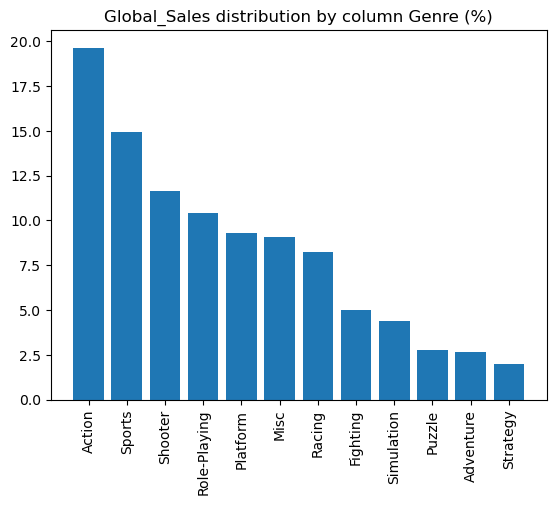

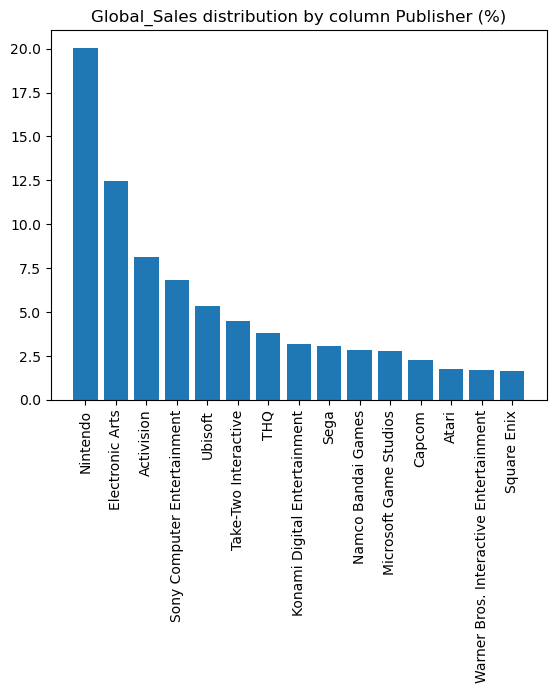

In [15]:
sales_column = 'Global_Sales'
plot_sales_dist_by_feature('Genre',sales_column)
plot_sales_dist_by_feature('Publisher',sales_column, top_x=15)

### Does this mean Nintendo Action games sell best?

Not quite... 

Let's see the best selling genres for Nintendo games, as well as best selling publishers for Action genre.

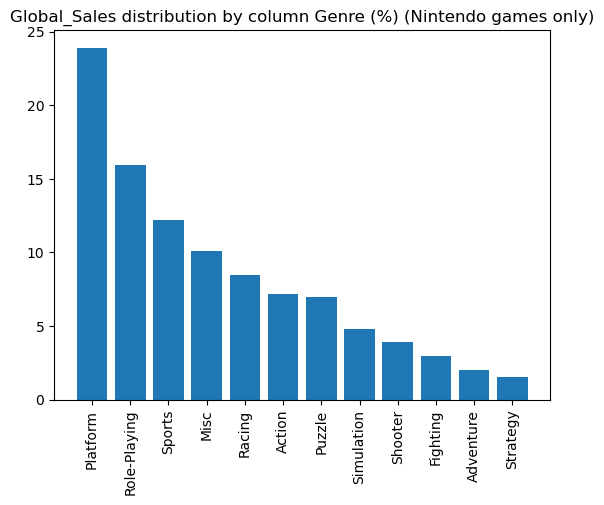

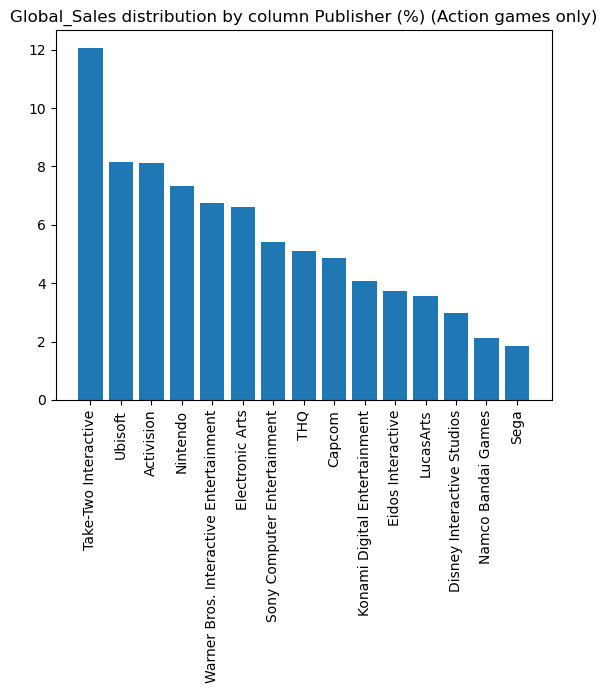

In [30]:
nintendo = df[df['Publisher']=='Nintendo'].copy()
plot_sales_dist_by_feature(nintendo,'Genre',sales_column,title_suffix='(Nintendo games only)')
action = df[df['Genre']=='Action']
plot_sales_dist_by_feature(action,'Publisher',sales_column, 15, title_suffix='(Action games only)')

## Question 2 - What is the top selling publisher per genre?

For each genre, group sales by publisher, sort by sales and take the top selling publisher.
To this, add what are the fraction of the top publisher's sales out of the total genre sales.

We can see that while Nintendo is the top seller in most of the genres, it does not rule the top three selling genres: Action, Sports and Shooter.

In [118]:
def get_top_publisher_per_genre(sales_col = 'Global_Sales'):
    top_publisher_per_genre = []
    for genre,gdf in df.groupby('Genre'):
        sales = gdf.groupby('Publisher')[sales_col].sum()
        genre_sales = gdf[sales_col].sum()
        sales = dict(zip(sales.index,sales.values))
        sales = sorted(sales.items(), key=lambda item: item[1],reverse=True)
        top_publisher_per_genre.append([genre,sales[0][0],sales[0][1],genre_sales])
        
    tpg = pd.DataFrame(top_publisher_per_genre, columns=['Genre','Publisher','Sales','Genre_Sales'])
    tpg["Pub/Genre Sales fraction"] = tpg['Sales']/tpg['Genre_Sales']
    tpg.sort_values('Genre_Sales',inplace=True,ascending=False)
    return tpg

get_top_publisher_per_genre()

,Genre,Publisher,Sales,Genre_Sales,Pub/Genre Sales fraction
0,Action,Take-Two Interactive,211.08,1750.37,0.120592
10,Sports,Electronic Arts,479.67,1329.35,0.360830
8,Shooter,Activision,299.87,1037.32,0.289081
7,Role-Playing,Nintendo,284.90,927.32,0.307229
4,Platform,Nintendo,427.21,830.89,0.514160
3,Misc,Nintendo,180.67,809.90,0.223077
6,Racing,Nintendo,151.30,732.04,0.206683
2,Fighting,THQ,72.86,445.70,0.163473
9,Simulation,Electronic Arts,89.53,392.14,0.228311
5,Puzzle,Nintendo,124.88,244.95,0.509818


## Question 3 - What is the reason for the low correlation between Japan and Global sales.

In the exploration of the data, we saw there was a very low correlation between global and Japanese sales (0.45).

Below we compare those two over Genre, Publisher and platform. 

It turns out that genre and publisher patterns are very different in Japan. The Role-Playing genre is not only the most selling there, but also by a very large margin, dominating more than 25% of the market, while the global market has a more balanced distribution.

Similar pattern emrges when looking at publisher sales, where Nintendo dominates the Japanese market, gaining 35% of the sales, while only taking 20% of global sales. 

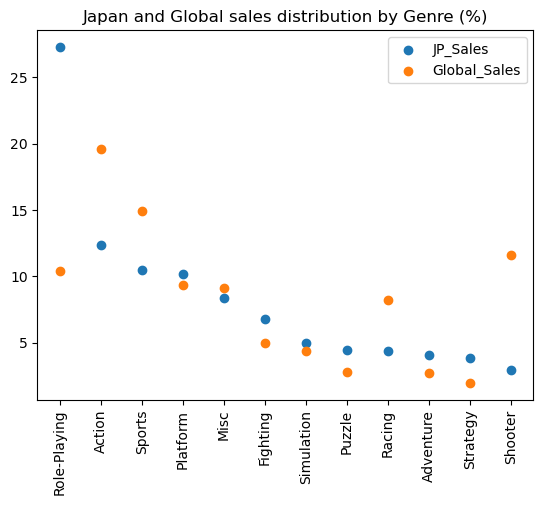

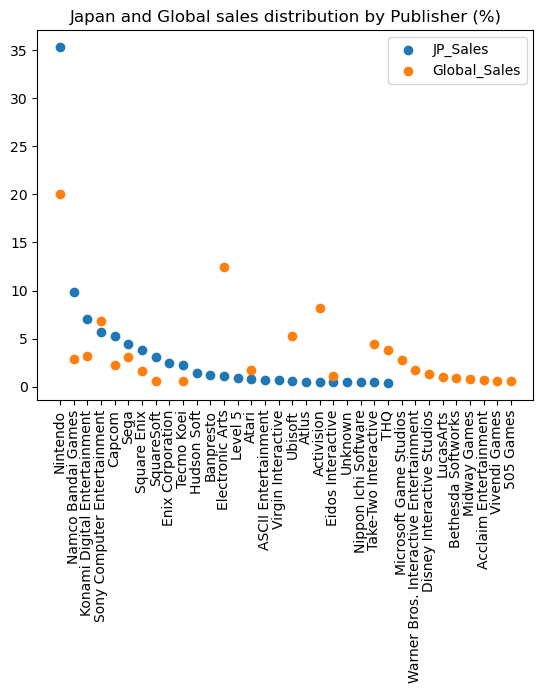

In [112]:
def plot_jp_na_sales_by_feature(df,col,top_x = False):
    """ plot a normalized histogram of a column by Global and Japan sales columns"""
    sales_cols = ['JP_Sales','Global_Sales']
    for sales_col in sales_cols:
        sales_sums = df[[col, sales_col]].groupby(col)[sales_col].sum()
        normalized = sales_sums/sum(df[sales_col])*100
        sorted_values = normalized.sort_values(ascending=False)
        if top_x:
            sorted_values = sorted_values[:top_x]
        plt.scatter(sorted_values.index, sorted_values.values)
    plt.title(f'Japan and Global sales distribution by {col} (%)')
    plt.xticks(rotation='vertical')
    plt.legend(sales_cols)
    plt.show()

plot_jp_na_sales_by_feature(df,'Genre')
plot_jp_na_sales_by_feature(df,'Publisher',25)

Let's utilize the function from our second question to see top publishers per genre in Japan. 

It turns out that Nintendo is dominant in most genres, including top genres.

In [119]:
get_top_publisher_per_genre(sales_col='JP_Sales')

,Genre,Publisher,Sales,Genre_Sales,Pub/Genre Sales fraction
7,Role-Playing,Nintendo,102.24,352.26,0.290240
0,Action,Nintendo,29.24,159.50,0.183323
10,Sports,Konami Digital Entertainment,44.39,135.25,0.328207
4,Platform,Nintendo,102.36,130.77,0.782748
3,Misc,Nintendo,55.25,107.72,0.512904
2,Fighting,Namco Bandai Games,19.83,87.35,0.227018
9,Simulation,Nintendo,23.67,63.64,0.371936
5,Puzzle,Nintendo,37.09,57.31,0.647182
6,Racing,Nintendo,29.22,56.69,0.515435
1,Adventure,Nintendo,9.01,52.01,0.173236
